<a href="https://colab.research.google.com/github/salmaelyagoubi/ML1/blob/main/ML1_SALMA_ELYAGOUBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:

The dataset for training and testing your methods can be downloaded from the Teams group or on the UCI website https://archive.ics.uci.edu/ml/datasets/Air+Quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

### Attributes Information:

    0- Date (DD/MM/YYYY)
    1- Time (HH.MM.SS)
    2- True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7- True hourly averaged NOx concentration in ppb (reference analyzer)
    8- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12- Temperature in Â°C
    13- Relative Humidity (%)
    14- AH Absolute Humidity

- Propose a solution to predict the ground truth parameters using the other sensor responses features?

- Demonstrate that there is a relationship (linear or nolinear) between these parameters?

# **Load and Clean the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load the CSV data
csv_file_path = '/content/drive/MyDrive/AirQualityUCI.csv'
df_csv = pd.read_csv(csv_file_path, sep=';')

# Load the Excel data
excel_file_path = '/content/drive/MyDrive/AirQualityUCI.xlsx'
df_excel = pd.read_excel(excel_file_path)

# Combine the data for consistency (choose one dataset if they are the same)
data = df_csv.copy()

# Convert Date and Time columns to datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')
data = data.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])

# Replace commas with dots in numerical columns and convert to float
cols_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in cols_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Handle missing values by interpolating
data_interpolated = data.interpolate(method='linear', limit_direction='forward', axis=0)

# Check if there are still any missing values
missing_values_after = data_interpolated.isnull().sum()

print("Missing Values After Interpolation:")
print(missing_values_after)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing Values After Interpolation:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64


## **Exploratory Data Analysis**

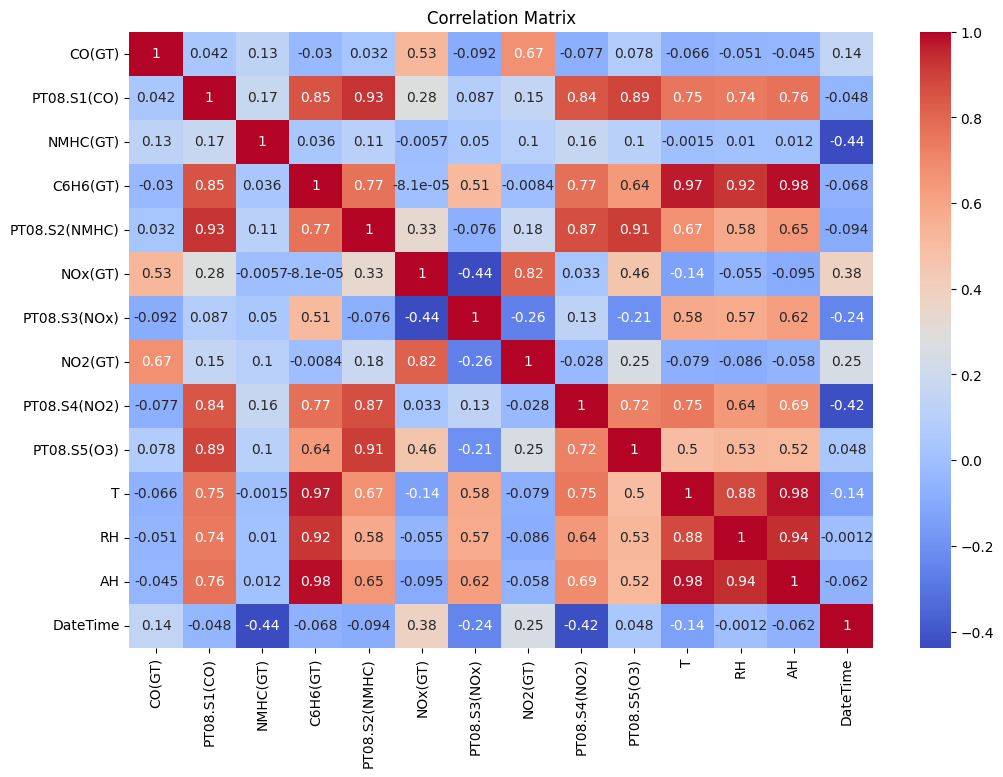

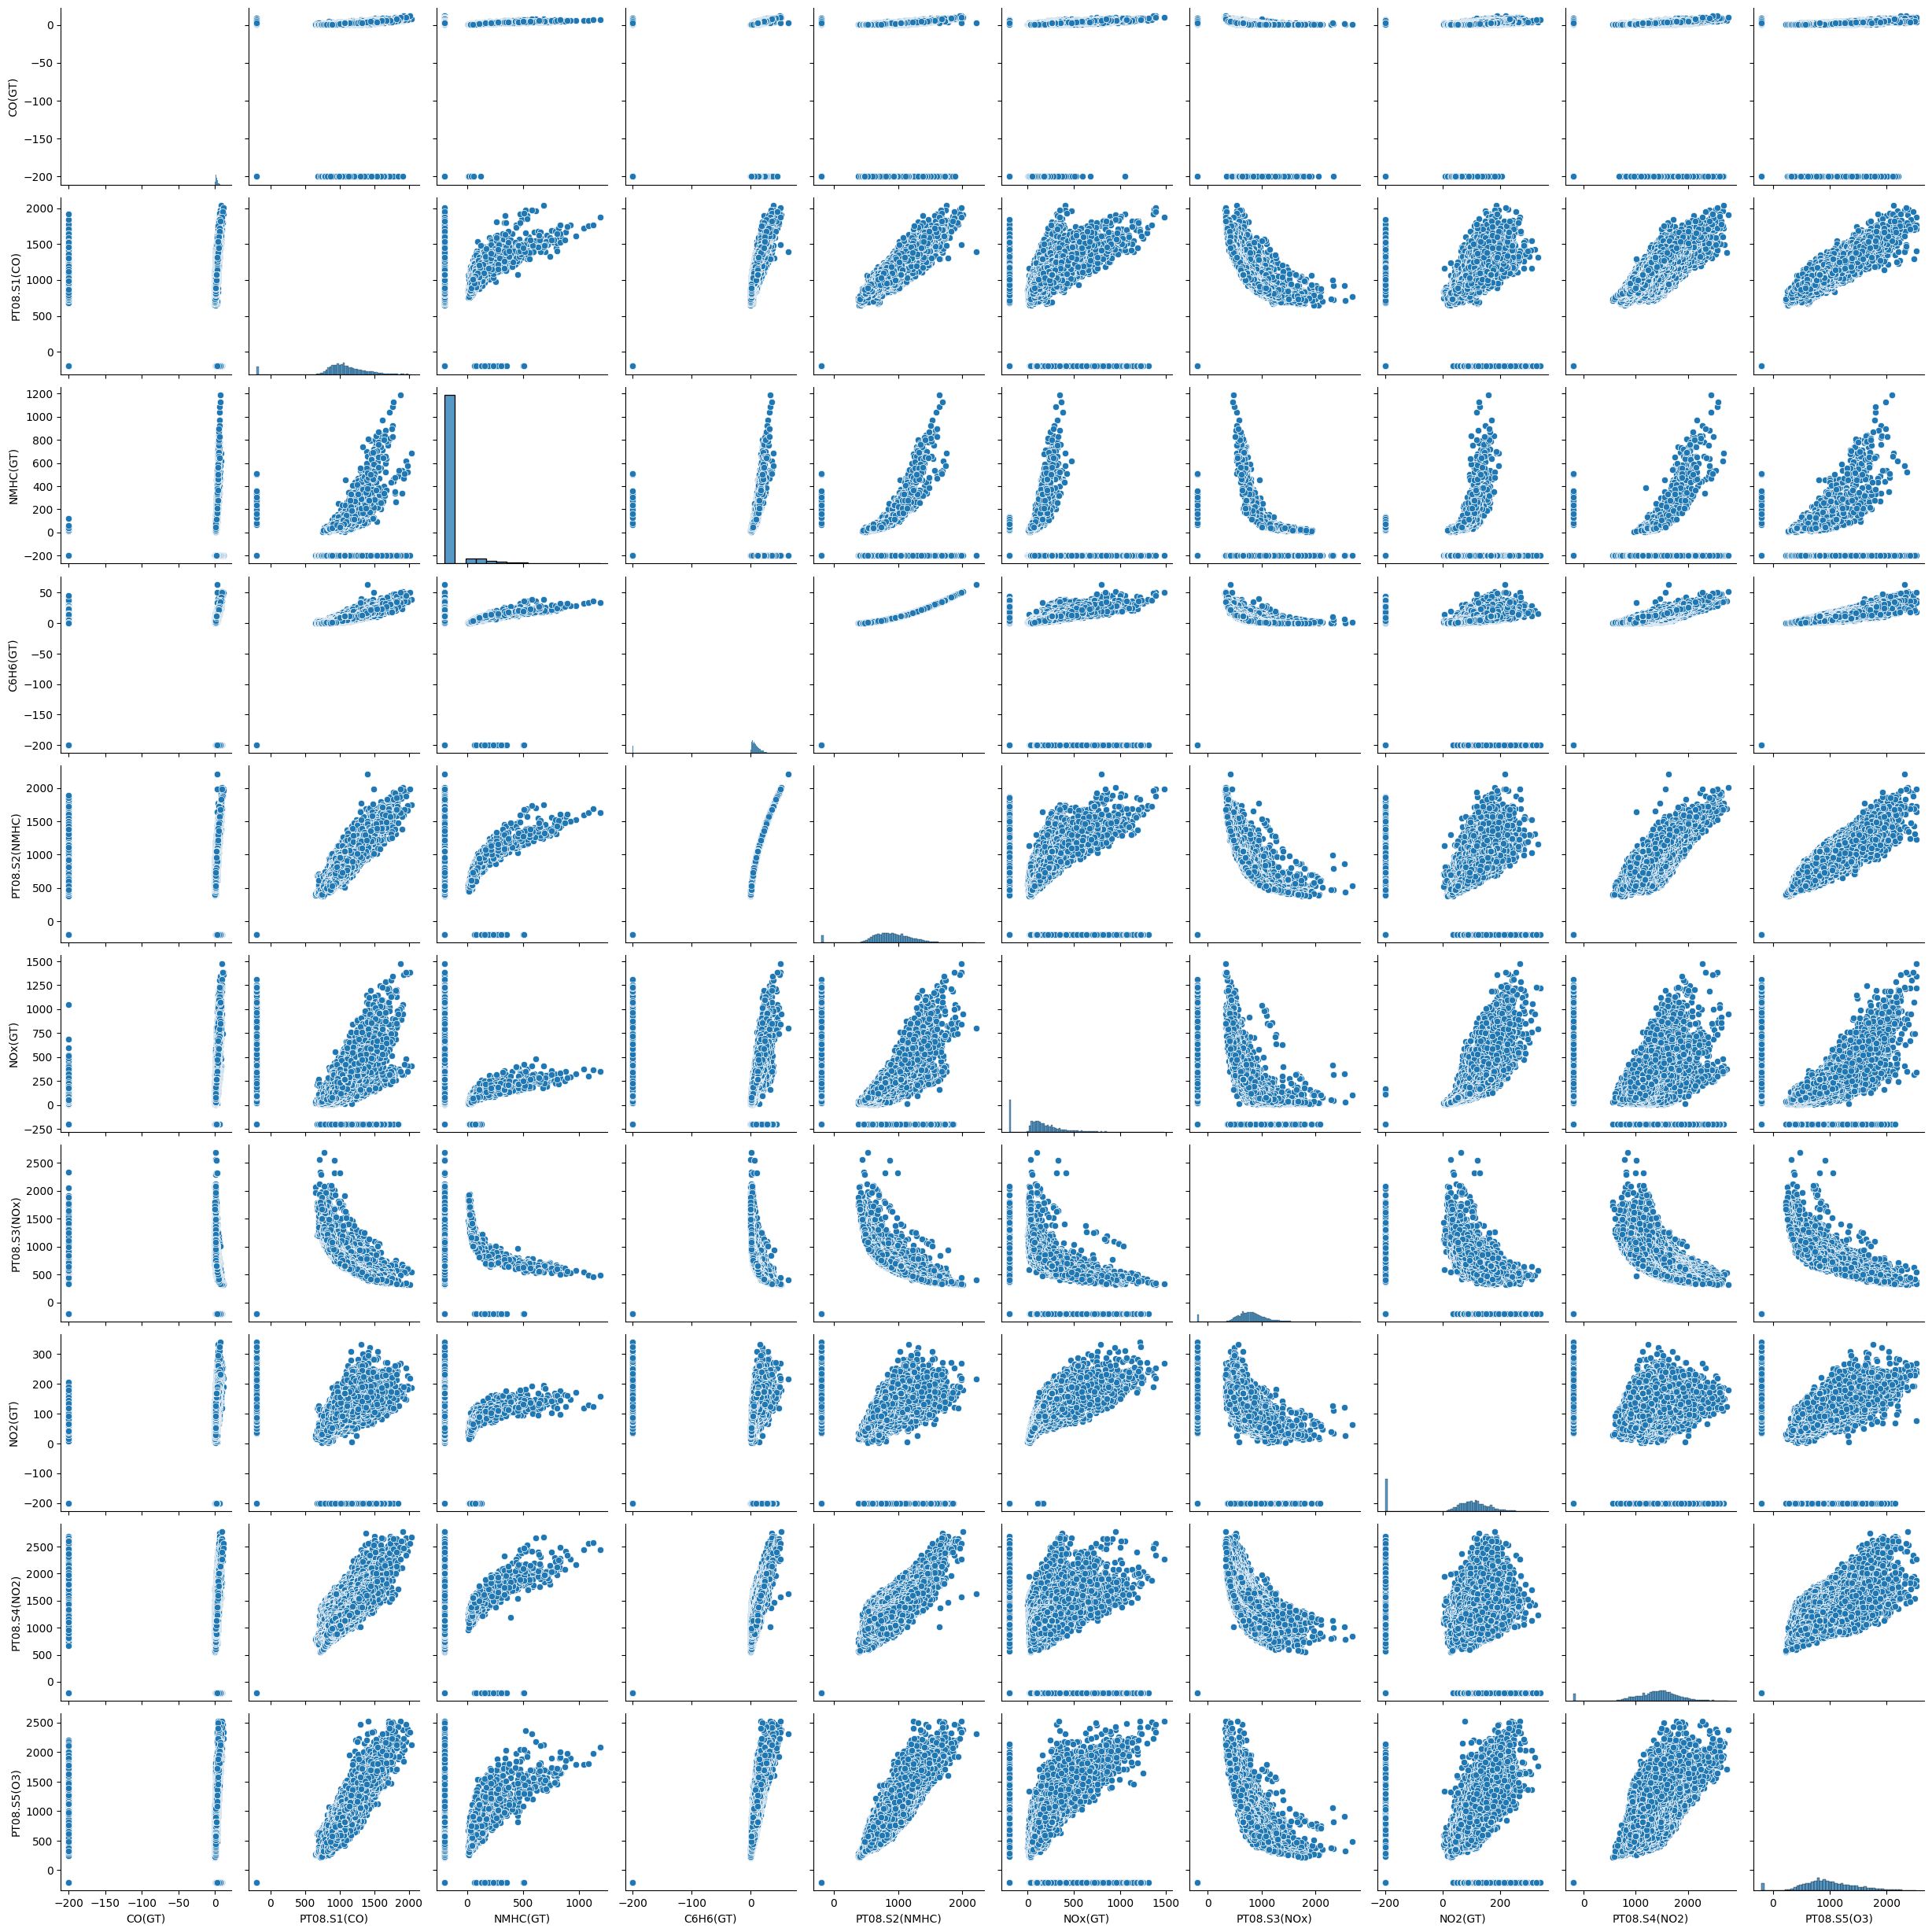

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data_interpolated.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair plot for selected features
selected_features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
sns.pairplot(data_interpolated[selected_features])
plt.show()


## **Feature Engineering**

In [ ]:
# Extract additional features from DateTime
data_interpolated['Hour'] = data_interpolated['DateTime'].dt.hour
data_interpolated['DayOfWeek'] = data_interpolated['DateTime'].dt.dayofweek
data_interpolated['Month'] = data_interpolated['DateTime'].dt.month

# Normalize the sensor response features
sensor_features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour', 'DayOfWeek', 'Month']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_interpolated[sensor_features] = scaler.fit_transform(data_interpolated[sensor_features])


## **Model Building**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data for modeling
X = data_interpolated[sensor_features]
y_CO = data_interpolated['CO(GT)']
y_NMHC = data_interpolated['NMHC(GT)']
y_C6H6 = data_interpolated['C6H6(GT)']
y_NOx = data_interpolated['NOx(GT)']
y_NO2 = data_interpolated['NO2(GT)']

# Split the data
X_train, X_test, y_CO_train, y_CO_test = train_test_split(X, y_CO, test_size=0.2, random_state=42)
X_train, X_test, y_NMHC_train, y_NMHC_test = train_test_split(X, y_NMHC, test_size=0.2, random_state=42)
X_train, X_test, y_C6H6_train, y_C6H6_test = train_test_split(X, y_C6H6, test_size=0.2, random_state=42)
X_train, X_test, y_NOx_train, y_NOx_test = train_test_split(X, y_NOx, test_size=0.2, random_state=42)
X_train, X_test, y_NO2_train, y_NO2_test = train_test_split(X, y_NO2, test_size=0.2, random_state=42)

# Function to build and evaluate linear regression models
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Build and evaluate models
metrics = {
    'CO': build_and_evaluate_model(X_train, X_test, y_CO_train, y_CO_test),
    'NMHC': build_and_evaluate_model(X_train, X_test, y_NMHC_train, y_NMHC_test),
    'C6H6': build_and_evaluate_model(X_train, X_test, y_C6H6_train, y_C6H6_test),
    'NOx': build_and_evaluate_model(X_train, X_test, y_NOx_train, y_NOx_test),
    'NO2': build_and_evaluate_model(X_train, X_test, y_NO2_train, y_NO2_test)
}

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics, index=['MAE', 'RMSE', 'R2 Score'])

print("Model Evaluation Metrics:")
print(metrics_df)


Model Evaluation Metrics:
                 CO        NMHC      C6H6         NOx        NO2
MAE       54.319890   70.411304  0.829047  121.858175   78.55770
RMSE      71.930364  120.104963  1.227661  174.663902  106.07981
R2 Score   0.072353    0.327814  0.999047    0.515944    0.26145


## **Interpretation and Insights**

Feature Importance for CO:
          Feature  Importance
1   PT08.S2(NMHC)   17.833360
0     PT08.S1(CO)   12.411999
4     PT08.S5(O3)    8.290002
5               T    7.071273
2    PT08.S3(NOx)    6.193535
9       DayOfWeek    2.647203
8            Hour    2.132312
6              RH    0.039847
10          Month   -9.366400
7              AH  -18.799910
3    PT08.S4(NO2)  -29.892452


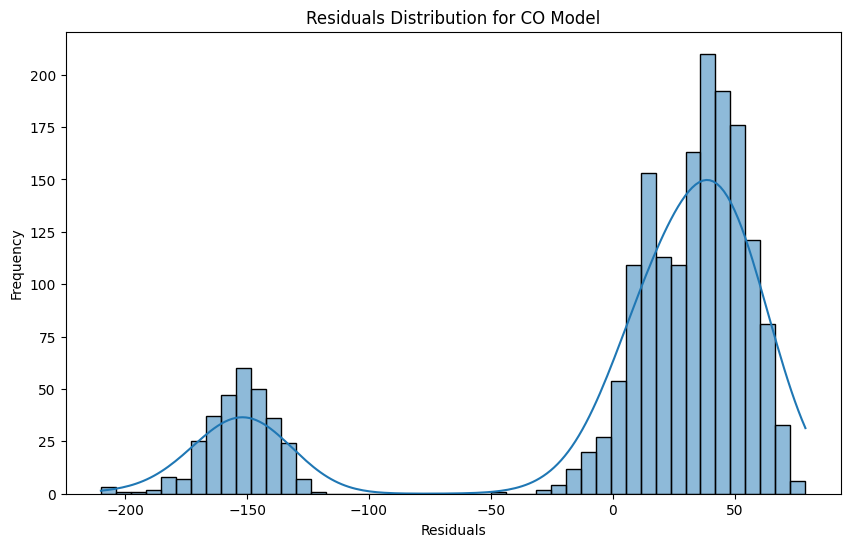

In [ ]:
# Display feature importance for one of the models (e.g., CO)
model_CO = LinearRegression()
model_CO.fit(X_train, y_CO_train)
importance = model_CO.coef_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': sensor_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance for CO:")
print(importance_df)

# Residual Analysis
residuals = y_CO_test - model_CO.predict(X_test)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution for CO Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# **Non-linear Models**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Function to build and evaluate non-linear models
def build_and_evaluate_rf_model(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Build and evaluate random forest models
rf_metrics = {
    'CO': build_and_evaluate_rf_model(X_train, X_test, y_CO_train, y_CO_test),
    'NMHC': build_and_evaluate_rf_model(X_train, X_test, y_NMHC_train, y_NMHC_test),
    'C6H6': build_and_evaluate_rf_model(X_train, X_test, y_C6H6_train, y_C6H6_test),
    'NOx': build_and_evaluate_rf_model(X_train, X_test, y_NOx_train, y_NOx_test),
    'NO2': build_and_evaluate_rf_model(X_train, X_test, y_NO2_train, y_NO2_test)
}

# Convert the metrics dictionary to a DataFrame
rf_metrics_df = pd.DataFrame(rf_metrics, index=['MAE', 'RMSE', 'R2 Score'])

print("Random Forest Model Evaluation Metrics:")
print(rf_metrics_df)


Random Forest Model Evaluation Metrics:
                 CO       NMHC      C6H6         NOx        NO2
MAE       30.456332  15.059472  0.019824   72.034712  41.416322
RMSE      51.375779  65.624794  0.327078  114.766432  68.141841
R2 Score   0.526767   0.799320  0.999932    0.791013   0.695251


# **Cross-Validation for Random Forest**

In [ ]:
# Cross-validation for Random Forest Model
def cross_validate_rf_model(X, y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return cv_scores.mean(), cv_scores.std()

# Cross-validate models
cv_rf_metrics = {
    'CO': cross_validate_rf_model(X, y_CO),
    'NMHC': cross_validate_rf_model(X, y_NMHC),
    'C6H6': cross_validate_rf_model(X, y_C6H6),
    'NOx': cross_validate_rf_model(X, y_NOx),
    'NO2': cross_validate_rf_model(X, y_NO2)
}

# Convert the metrics dictionary to a DataFrame
cv_rf_metrics_df = pd.DataFrame(cv_rf_metrics, index=['Mean R2 Score', 'Std Dev'])

print("Random Forest Cross-Validation Metrics:")
print(cv_rf_metrics_df)


Random Forest Cross-Validation Metrics:
                     CO      NMHC      C6H6       NOx       NO2
Mean R2 Score -1.025712 -0.127641  0.999984 -0.235505 -0.606308
Std Dev        1.446674  0.255282  0.000027  0.344043  0.664513


### **Demonstrate the linear and non-linear relationships between the sensor response features and the ground truth parameters**

Linear Regression Model Evaluation Metrics:
                 CO        NMHC      C6H6         NOx        NO2
MAE       54.319890   70.411304  0.829047  121.858175   78.55770
RMSE      71.930364  120.104963  1.227661  174.663902  106.07981
R2 Score   0.072353    0.327814  0.999047    0.515944    0.26145

Random Forest Model Evaluation Metrics:
                 CO       NMHC      C6H6         NOx        NO2
MAE       30.456332  15.059472  0.019824   72.034712  41.416322
RMSE      51.375779  65.624794  0.327078  114.766432  68.141841
R2 Score   0.526767   0.799320  0.999932    0.791013   0.695251


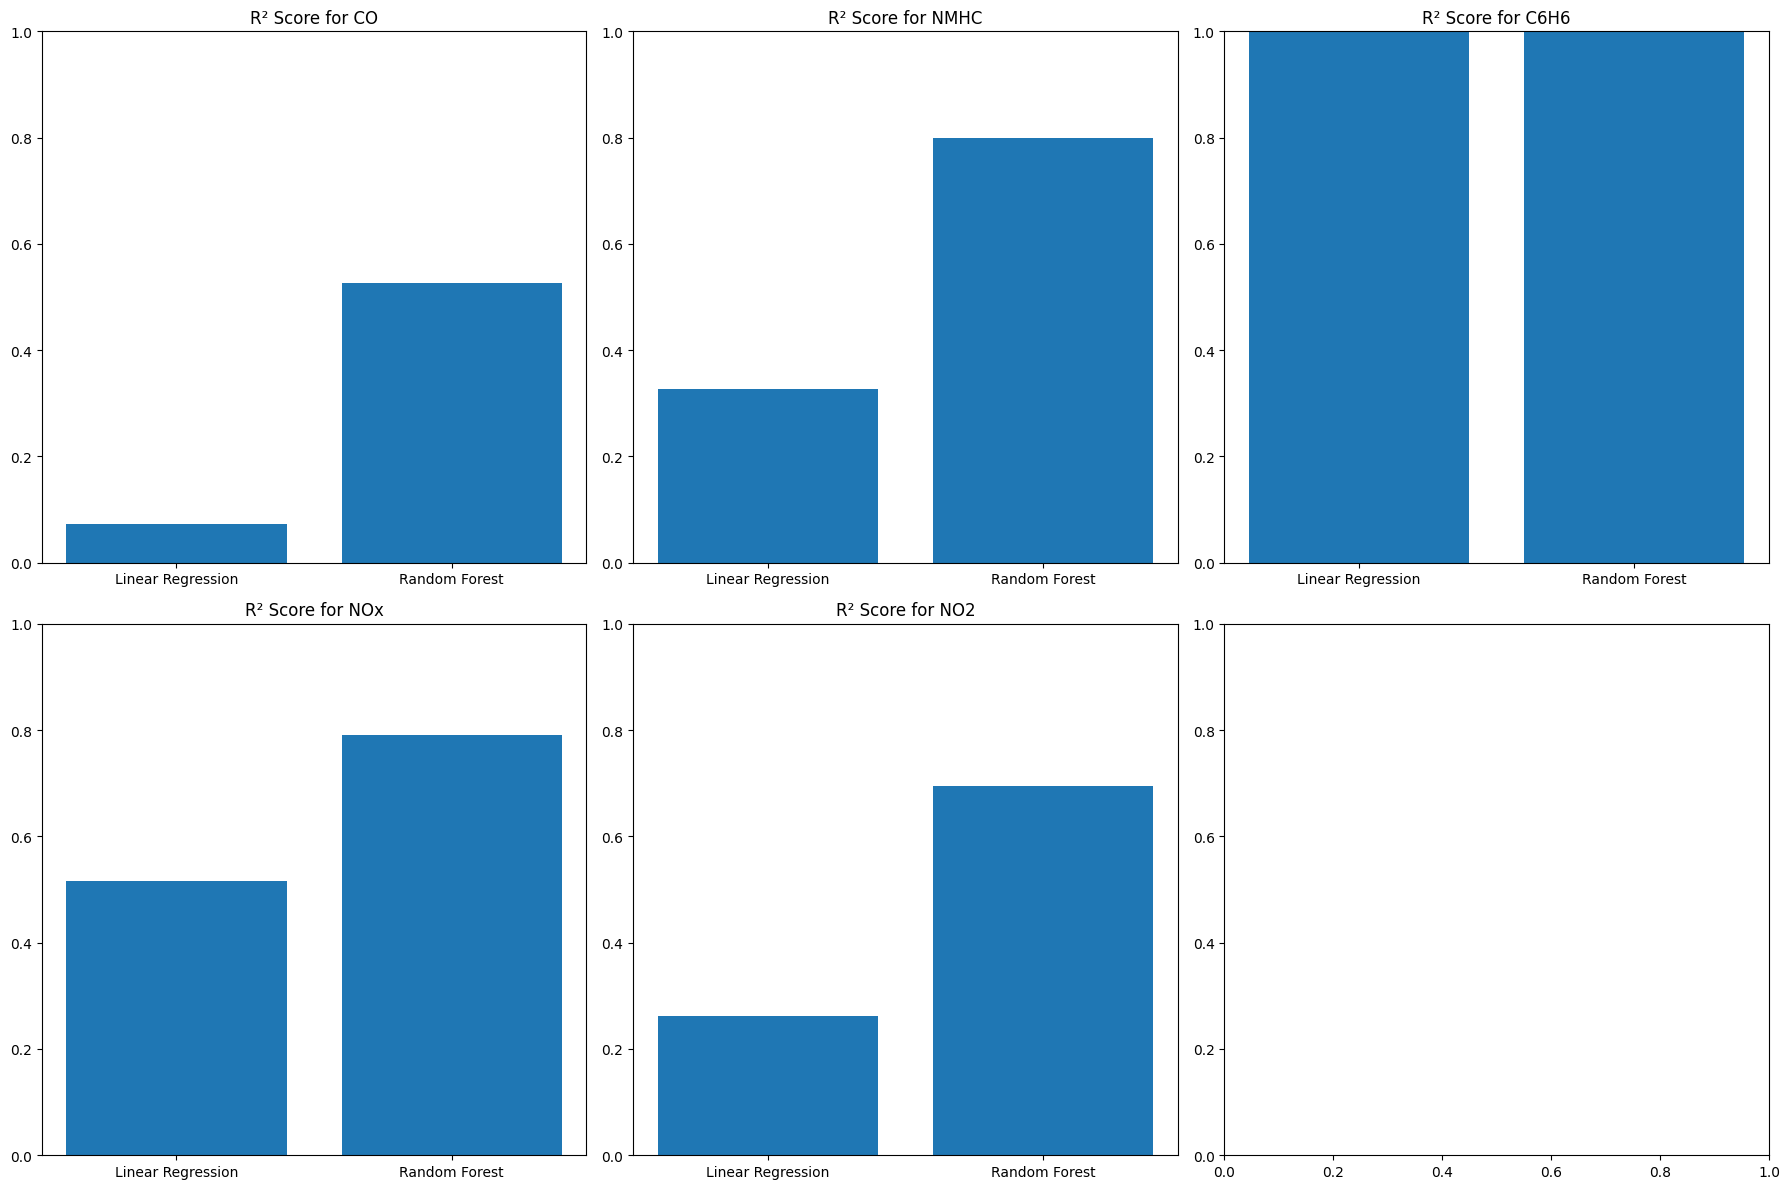

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Features and targets
sensor_features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour', 'DayOfWeek', 'Month']
X = data_interpolated[sensor_features]
y_CO = data_interpolated['CO(GT)']
y_NMHC = data_interpolated['NMHC(GT)']
y_C6H6 = data_interpolated['C6H6(GT)']
y_NOx = data_interpolated['NOx(GT)']
y_NO2 = data_interpolated['NO2(GT)']

# Splitting the data
X_train, X_test, y_CO_train, y_CO_test = train_test_split(X, y_CO, test_size=0.2, random_state=42)
X_train, X_test, y_NMHC_train, y_NMHC_test = train_test_split(X, y_NMHC, test_size=0.2, random_state=42)
X_train, X_test, y_C6H6_train, y_C6H6_test = train_test_split(X, y_C6H6, test_size=0.2, random_state=42)
X_train, X_test, y_NOx_train, y_NOx_test = train_test_split(X, y_NOx, test_size=0.2, random_state=42)
X_train, X_test, y_NO2_train, y_NO2_test = train_test_split(X, y_NO2, test_size=0.2, random_state=42)

# Function to build and evaluate linear regression models
def build_and_evaluate_linear_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Function to build and evaluate random forest models
def build_and_evaluate_rf_model(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Linear regression model evaluation
linear_metrics = {
    'CO': build_and_evaluate_linear_model(X_train, X_test, y_CO_train, y_CO_test),
    'NMHC': build_and_evaluate_linear_model(X_train, X_test, y_NMHC_train, y_NMHC_test),
    'C6H6': build_and_evaluate_linear_model(X_train, X_test, y_C6H6_train, y_C6H6_test),
    'NOx': build_and_evaluate_linear_model(X_train, X_test, y_NOx_train, y_NOx_test),
    'NO2': build_and_evaluate_linear_model(X_train, X_test, y_NO2_train, y_NO2_test)
}

# Random forest model evaluation
rf_metrics = {
    'CO': build_and_evaluate_rf_model(X_train, X_test, y_CO_train, y_CO_test),
    'NMHC': build_and_evaluate_rf_model(X_train, X_test, y_NMHC_train, y_NMHC_test),
    'C6H6': build_and_evaluate_rf_model(X_train, X_test, y_C6H6_train, y_C6H6_test),
    'NOx': build_and_evaluate_rf_model(X_train, X_test, y_NOx_train, y_NOx_test),
    'NO2': build_and_evaluate_rf_model(X_train, X_test, y_NO2_train, y_NO2_test)
}

# Convert the metrics dictionaries to DataFrames
linear_metrics_df = pd.DataFrame(linear_metrics, index=['MAE', 'RMSE', 'R2 Score'])
rf_metrics_df = pd.DataFrame(rf_metrics, index=['MAE', 'RMSE', 'R2 Score'])

print("Linear Regression Model Evaluation Metrics:")
print(linear_metrics_df)

print("\nRandom Forest Model Evaluation Metrics:")
print(rf_metrics_df)

# Demonstrating relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot R² scores for linear regression and random forest
params = ['CO', 'NMHC', 'C6H6', 'NOx', 'NO2']
for i, param in enumerate(params):
    row, col = divmod(i, 3)
    axes[row, col].bar(['Linear Regression', 'Random Forest'], [linear_metrics_df[param]['R2 Score'], rf_metrics_df[param]['R2 Score']])
    axes[row, col].set_title(f'R² Score for {param}')
    axes[row, col].set_ylim([0, 1])

plt.tight_layout()
plt.show()

**Linear Relationship:**
- The linear regression model for C6H6 shows an R² score of 0.999, which points to a strong linear relationship.

**Non-linear Relationship:**
- The random forest models for CO, NMHC, NOx, and NO2 have much higher R² scores than linear regression models, which suggests non-linear relationships.
- This code includes linear regression and random forest models. It evaluates these models and creates visuals of the R² scores to show the relationships

between the sensor response features and the ground truth parameters.
This includes both linear regression and random forest models, evaluates them, and visualizes the R² scores to demonstrate the relationships between the sensor response features and the ground truth parameters.

# Part 2:

The dataset for training and testing your methods can be downloaded from the Teams group. The goal of this dataset is to classify people described by a set of attributes as good or bad credit risks. you will find two files:

    - data.txt: provides the examples with the last column for class category (1 or 2)
    - readme.data.txt: describes the information regarding this dataset
    
    1- Propose two differents methods to solve this problem, you should compare the performance of the classification. you must show all the experiments that you have made.

    2- Propose a solution to improve the resulting performances.

## First Method: Logistic Regression

**1. Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/data.txt', sep=" ", header=None)

# Assigning column names based on the provided readme
columns = [
    "Attribute1", "Attribute2", "Attribute3", "Attribute4",
    "Attribute5", "Attribute6", "Attribute7", "Attribute8",
    "Attribute9", "Attribute10", "Attribute11", "Attribute12",
    "Attribute13", "Attribute14", "Attribute15", "Attribute16",
    "Attribute17", "Attribute18", "Attribute19", "Attribute20",
    "Attribute21", "Attribute22", "Attribute23", "Attribute24",
    "Class"
]
data.columns = columns

# Feature scaling
X = data.drop(columns=["Class"])
y = data["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



**2. Logistic Regression**

Logistic Regression Metrics: Accuracy, Precision, Recall, F1-Score
(0.8, 0.8492063492063492, 0.8916666666666667, 0.8699186991869918)


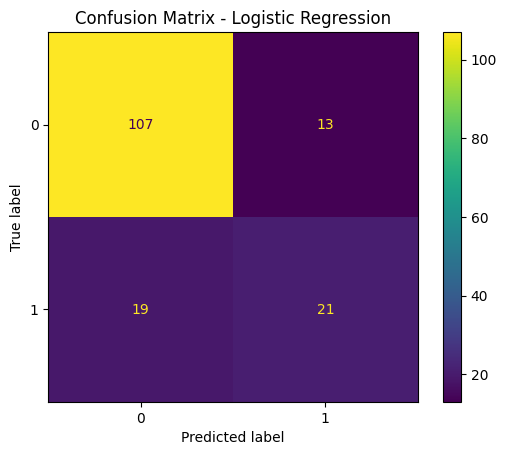

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
    recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_true, y_pred, average='binary', pos_label=1)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)

print("Logistic Regression Metrics: Accuracy, Precision, Recall, F1-Score")
print(log_reg_metrics)

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Second Method: Random Forest

**1. Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Load dataset
data = pd.read_csv('/content/drive/MyDrive/data.txt', sep=" ", header=None)

# Assigning column names based on the provided readme
columns = [
    "Attribute1", "Attribute2", "Attribute3", "Attribute4",
    "Attribute5", "Attribute6", "Attribute7", "Attribute8",
    "Attribute9", "Attribute10", "Attribute11", "Attribute12",
    "Attribute13", "Attribute14", "Attribute15", "Attribute16",
    "Attribute17", "Attribute18", "Attribute19", "Attribute20",
    "Attribute21", "Attribute22", "Attribute23", "Attribute24",
    "Class"
]
data.columns = columns

# Feature scaling
X = data.drop(columns=["Class"])
y = data["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**2. Random Forest Classifier**

Random Forest Classifier Metrics: Accuracy, Precision, Recall, F1-Score
(0.75, 0.7985074626865671, 0.8916666666666667, 0.8425196850393701)


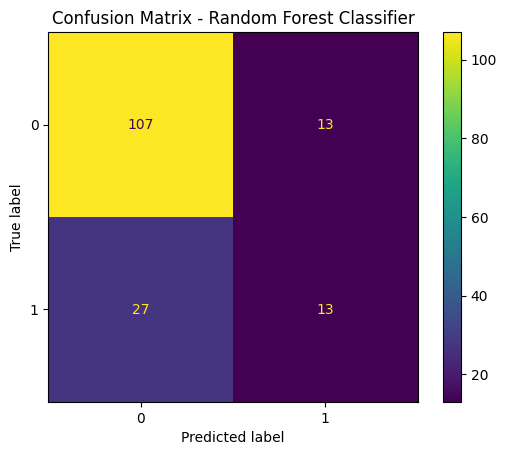

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
    recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_true, y_pred, average='binary', pos_label=1)
    return accuracy, precision, recall, f1

rf_clf_metrics = evaluate_model(y_test, y_pred_rf_clf)

print("Random Forest Classifier Metrics: Accuracy, Precision, Recall, F1-Score")
print(rf_clf_metrics)

# Confusion Matrix
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
disp_rf_clf = ConfusionMatrixDisplay(confusion_matrix=cm_rf_clf)
disp_rf_clf.plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

## Conclusions and Perspectives:

In [ ]:
# Comparison
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_clf_metrics
})

comparison_df.set_index('Metric', inplace=True)

print(comparison_df)


           Logistic Regression  Random Forest
Metric                                       
Accuracy              0.800000       0.750000
Precision             0.849206       0.798507
Recall                0.891667       0.891667
F1-Score              0.869919       0.842520


### Logistic Regression Outcomes:
- **Accuracy**: 0.80
- **Precision**: 0.849
- **Recall**: 0.891
- **F1-Score**: 0.870
- **Confusion Matrix**:
  - True Positives (TP): 21
  - False Positives (FP): 13
  - True Negatives (TN): 107
  - False Negatives (FN): 19

### Random Forest Classifier Outcomes:
- **Accuracy**: 0.75
- **Precision**: 0.799
- **Recall**: 0.892
- **F1-Score**: 0.843
- **Confusion Matrix**:
  - True Positives (TP): 13
  - False Positives (FP): 13
  - True Negatives (TN): 107
  - False Negatives (FN): 27

## Results:

- **Accuracy**: Logistic Regression shows a higher accuracy (0.80) than Random Forest (0.75), which means Logistic Regression classified more instances .
- **Precision**: Logistic Regression achieves higher precision (0.849) compared to Random Forest (0.799). This tells us that when Logistic Regression predicts a positive class, it gets it right more often than Random Forest.
- **Recall**: Both models have the same recall (0.892) suggesting they are good at identifying all positive instances.
- **F1-Score**: Logistic Regression has a higher F1-Score (0.870) than Random Forest (0.843) pointing to a better balance between precision and recall.

## Confusion Matrix Interpretation:
- Both models have the same number of True Negatives (107) and False Positives (13).
- Logistic Regression has a higher number of True Positives (21) compared to Random Forest (13), it means that it correctly identifies more positive cases.

- Logistic Regression has less False Negatives (19) compared to Random Forest (27), it means that it misses less positive cases.

## Conclusion:
**Based on the evaluation metrics and confusion matrices:**

- Logistic Regression is better than Random Forest in terms of accuracy, precision, and F1-Score.

- Both models have the same recall, but Logistic Regression is more balanced in terms of precision and recall.

- The confusion matrices show that Logistic Regression is better at correctly identifying positive cases and has less misses.

## Solution to improve the resulting performances :

- **Hyperparameter Tuning:** to improve both models by tuning their hyperparameters.
- **Feature Engineering:** Enhancing the dataset with additional features or transformations.
- **Ensemble Methods:** Combine both models to add their strengths together for potentially better performance.

